In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import Visualizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, BaggingClassifier, StackingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, recall_score, precision_score, f1_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
print(train.shape)
print(test.shape)

(6461, 90)
(2769, 90)


In [4]:
train.drop("Unnamed: 0", axis = 1, inplace = True)
test.drop("Unnamed: 0", axis = 1, inplace = True)

In [5]:
train.sample(frac = 0.1).reset_index().drop("index", axis = 1, inplace = True)
test.sample(frac = 0.1).reset_index().drop("index", axis = 1, inplace = True)

In [6]:
x_train = train.drop("Converted", axis = 1)
y_train = train.iloc[:, -1]
x_test = test.drop("Converted", axis = 1)
y_test = test.iloc[:, -1]

In [40]:
pd.set_option('display.max_columns', 500)

In [41]:
x_train.head()

Tags_Will revert after reading the email  Total Time Spent on Website  \
0                                         0                            0   
1                                         0                         1440   
2                                         0                          169   
3                                         1                          734   
4                                         0                            0   

   Lead Profile_Potential Lead  Last Notable Activity_SMS Sent  \
0                            0                               0   
1                            0                               0   
2                            0                               0   
3                            0                               1   
4                            0                               0   

   Last Activity_SMS Sent  \
0                       0   
1                       0   
2                       0   
3                       1   
4                       0   

   What is your current occupation_Working Professional  \
0                                                  0      
1                                                  0      
2                                                  0      
3                                                  0      
4                                                  0      

   Lead Origin_Lead Add Form  Lead Profile_Unspecified  Lead Source_Reference  \
0                          0                         1                      0   
1                          0                         1                      0   
2                          0                         1                      0   
3                          0                         1                      0   
4                          0                         1                      0   

   What is your current occupation_Unemployed  \
0                                           1   
1                                           1   
2                                           1   
3                                           1   
4                                           1   

   Tags_Interested in other courses  Tags_Ringing  Tags_Closed by Horizzon  \
0                                 1             0                        0   
1                                 0             0                        0   
2                                 0             0                        0   
3                                 0             0                        0   
4                                 0             0                        0   

   Last Notable Activity_Modified  TotalVisits  \
0                               1          0.0   
1                               1          3.0   
2                               1          2.0   
3                               0          4.0   
4                               0          0.0   

   Last Activity_Olark Chat Conversation  Specialization_Unspecified  \
0                                      1                           1   
1                                      1                           0   
2                                      0                           0   
3                                      0                           0   
4                                      1                           1   

   Tags_Interested  in full time MBA  Lead Source_Welingak Website  \
0                                  0                             0   
1                                  0                             0   
2                                  0                             0   
3                                  0                             0   
4                                  0                             0   

   Tags_number not provided  Last Activity_Had a Phone Conversation  \
0                         0                                       0   
1                         0                                       0   


In [42]:
ct = ColumnTransformer([('se', StandardScaler(), ['Total Time Spent on Website', 'Page Views Per Visit', 'TotalVisits'])], remainder='passthrough')

In [51]:
random_forest_pipeline = Pipeline([('transformer', ct), ('RandomForest', RandomForestClassifier(random_state = 42))])
adaboost_pipeline = Pipeline([('transformer', ct), ('Adaboost', AdaBoostClassifier(random_state = 42))])
ExtraTree_pipeline = Pipeline([('transformer', ct), ('ExtraTreeClassifier', ExtraTreesClassifier(random_state = 42))])
BaggingClassifier_pipeline = Pipeline([('transformer', ct), ('BaggingClassifier', BaggingClassifier(base_estimator = DecisionTreeClassifier(), random_state = 42))])
GradientBoost_pipeline = Pipeline([('transformer', ct), ('GradientBoosting', GradientBoostingClassifier(random_state = 42))])
dtree_pipeline = Pipeline([('transformer', ct), ('DecisionTree', DecisionTreeClassifier(random_state = 42))])
knn_pipeline = Pipeline([('transformer', ct), ('KNN', KNeighborsClassifier())])
lr_pipeline = Pipeline([('transformer', ct), ('LogisticRegression', LogisticRegression(random_state = 42))])
sgd_pipeline = Pipeline([('transformer', ct), ('StochasticGradient', SGDClassifier(random_state = 42))])
mlp_pipeline = Pipeline([('transformer', ct), ('MLPClassifier', MLPClassifier(random_state = 42))])
naive_pipeline = Pipeline([('transformer', ct), ('NaiveBayes', GaussianNB())])
svc_pipeline = Pipeline([('transformer', ct), ('SVM', SVC(random_state = 42))])
lightgbm_pipeline = Pipeline([('transformer', ct), ('lightgbm', LGBMClassifier(random_state = 42))])
catboost_pipeline = Pipeline([('transformer', ct), ('CatBoost', CatBoostClassifier(random_state = 42, silent = True))])
xgboost_pipeline = Pipeline([('transformer', ct), ('XGBoost', XGBClassifier(random_state = 42))])

In [55]:
pipeline_list = [random_forest_pipeline, adaboost_pipeline, ExtraTree_pipeline, BaggingClassifier_pipeline, GradientBoost_pipeline,
                dtree_pipeline, knn_pipeline, lr_pipeline, sgd_pipeline, mlp_pipeline, naive_pipeline, svc_pipeline,
                lightgbm_pipeline, catboost_pipeline, xgboost_pipeline]

In [56]:
pipe_dict = {0: "RandomForest", 1: "Adaboost", 2: "ExtraTree", 3: "BaggingClassifier", 4: "GradientBoosting", 5: "DecisionTree",
            6: "KNN", 7: "Logistic", 8: "SGD Classifier", 9: "MLPClassifier", 10: "NaiveBayes",
            11: "SVM", 12: "LightGBM", 13: "Catboost", 14: "XGBoost"}

In [57]:
for idx, pipe in enumerate(pipeline_list):
    score = cross_val_score(pipe, x_train, y_train, cv = 10, scoring = 'accuracy')
    print(pipe_dict[idx], ":", score.mean())

RandomForest : 0.9114682674501511
Adaboost : 0.9054311157473647
ExtraTree : 0.904040558711079
BaggingClassifier : 0.9037302434192581
GradientBoosting : 0.9100762748766634
DecisionTree : 0.8775752341121921
KNN : 0.8854682961608951
Logistic : 0.9034192103588363
SGD Classifier : 0.8970727003890306
MLPClassifier : 0.9015635392691204
NaiveBayes : 0.8593082624736219
SVM : 0.909456601317823
LightGBM : 0.913480172838679
Catboost : 0.9128612170484398
XGBoost : 0.9075985376661035


Based on the above results, we will be choosing the **RandomForest Classifier, GradientBoosting, LightGBM & Catboost** on which we are going to test the other metrics to see in depth performance of these 4 models based on several different metrics to choose the best model for our analysis.

In [98]:
def evaluate_model(model, x_train, y_train, x_test, y_test):
    model = model.fit(x_train, y_train)
    predict_train_y = model.predict(x_train)
    predict_test_y = model.predict(x_test)
    
    print("**Accuracy Score**")
    train_accuracy = accuracy_score(y_train, predict_train_y)
    test_accuracy = accuracy_score(y_test, predict_test_y)
    print("Train Accuracy is: %s"%(train_accuracy))
    print("\nTest Accuracy is: %s"%(test_accuracy))
    print("---------------------------------------------------------")
    
    print("\n**Accuracy Error**")
    train_error = (1-train_accuracy)
    test_error = (1-test_accuracy)
    print("Train Error: %s"%(train_error))
    print("\nTest Error: %s"%(test_error))
    print("---------------------------------------------------------")
    
    print("\n**Classification Report**")
    train_cf_report = pd.DataFrame(classification_report(y_train, predict_train_y, output_dict = True))
    test_cf_report = pd.DataFrame(classification_report(y_test, predict_test_y, output_dict = True))
    print("Train Classification Report:")
    print(train_cf_report)
    print("\n Test Classification Report:")
    print(test_cf_report)
    print("---------------------------------------------------------")
    
    print("\n**Confusion Matrix**")
    train_conf = confusion_matrix(y_train, predict_train_y)
    test_conf = confusion_matrix(y_test, predict_test_y)
    print("Train Confusion Matrix Report:")
    print((train_conf))
    print("\n Test Confusion Matrix Report:")
    print((test_conf))

### RANDOM FOREST CLASSIFIER

In [99]:
rforest = RandomForestClassifier(random_state= 42)

In [100]:
evaluate_model(rforest, x_train, y_train, x_test, y_test)

**Accuracy Score**
Train Accuracy is: 0.9846772945364495

Test Accuracy is: 0.9169375225713254
---------------------------------------------------------

**Accuracy Error**
Train Error: 0.015322705463550523

Test Error: 0.08306247742867456
---------------------------------------------------------

**Classification Report**
Train Classification Report:
                     0            1  accuracy    macro avg  weighted avg
precision     0.979597     0.993038  0.984677     0.986318      0.984813
recall        0.995701     0.967292  0.984677     0.981496      0.984677
f1-score      0.987583     0.979996  0.984677     0.983790      0.984639
support    3954.000000  2507.000000  0.984677  6461.000000   6461.000000

 Test Classification Report:
                     0            1  accuracy    macro avg  weighted avg
precision     0.918448     0.914228  0.916938     0.916338      0.916846
recall        0.950524     0.862036  0.916938     0.906280      0.916938
f1-score      0.934211     0.887

### GRADIENT BOOSTING CLASSIFIER

In [101]:
GradientBoost = GradientBoostingClassifier(random_state = 42)

In [102]:
evaluate_model(GradientBoost, x_train, y_train, x_test, y_test)

**Accuracy Score**
Train Accuracy is: 0.9173502553784244

Test Accuracy is: 0.9165763813651138
---------------------------------------------------------

**Accuracy Error**
Train Error: 0.0826497446215756

Test Error: 0.08342361863488623
---------------------------------------------------------

**Classification Report**
Train Classification Report:
                     0            1  accuracy    macro avg  weighted avg
precision     0.907143     0.936311   0.91735     0.921727      0.918461
recall        0.963581     0.844436   0.91735     0.904008      0.917350
f1-score      0.934511     0.888003   0.91735     0.911257      0.916465
support    3954.000000  2507.000000   0.91735  6461.000000   6461.000000

 Test Classification Report:
                     0            1  accuracy    macro avg  weighted avg
precision     0.913745     0.921811  0.916576     0.917778      0.916806
recall        0.955763     0.852521  0.916576     0.904142      0.916576
f1-score      0.934282     0.88581

### LIGHTGBM CLASSIFIER

In [103]:
lgbm = LGBMClassifier(random_state=42)

In [104]:
evaluate_model(lgbm, x_train, y_train, x_test, y_test)

**Accuracy Score**
Train Accuracy is: 0.9458288190682557

Test Accuracy is: 0.9154929577464789
---------------------------------------------------------

**Accuracy Error**
Train Error: 0.054171180931744334

Test Error: 0.08450704225352113
---------------------------------------------------------

**Classification Report**
Train Classification Report:
                     0            1  accuracy    macro avg  weighted avg
precision     0.941234     0.953723  0.945829     0.947479      0.946080
recall        0.972180     0.904268  0.945829     0.938224      0.945829
f1-score      0.956457     0.928337  0.945829     0.942397      0.945546
support    3954.000000  2507.000000  0.945829  6461.000000   6461.000000

 Test Classification Report:
                     0            1  accuracy    macro avg  weighted avg
precision     0.921112     0.905660  0.915493     0.913386      0.915247
recall        0.944703     0.867745  0.915493     0.906224      0.915493
f1-score      0.932759     0.886

### CATBOOST CLASSIFIER

In [105]:
catboost_classif = CatBoostClassifier(random_state=42, silent = True)

In [106]:
evaluate_model(catboost_classif, x_train, y_train, x_test, y_test)

**Accuracy Score**
Train Accuracy is: 0.9405664757777434

Test Accuracy is: 0.92018779342723
---------------------------------------------------------

**Accuracy Error**
Train Error: 0.05943352422225656

Test Error: 0.07981220657277
---------------------------------------------------------

**Classification Report**
Train Classification Report:
                     0            1  accuracy    macro avg  weighted avg
precision     0.934307     0.951510  0.940566     0.942908      0.940982
recall        0.971168     0.892302  0.940566     0.931735      0.940566
f1-score      0.952381     0.920955  0.940566     0.936668      0.940187
support    3954.000000  2507.000000  0.940566  6461.000000   6461.000000

 Test Classification Report:
                     0            1  accuracy    macro avg  weighted avg
precision     0.920742     0.919192  0.920188     0.919967      0.920154
recall        0.953434     0.865842  0.920188     0.909638      0.920188
f1-score      0.936803     0.891720  0

## Models Evaluation & Performance Benchmarking
<img src = "https://storage.googleapis.com/kaggle-media/launches/model-evaluation-workshop/model-evaluation-spot.png">

#### A) Model Accuracy:

**1) Random Forest:** When it comes to train accuracy, Random Forest have the accuracy of 98.4677% while test accuracy has been declined to 91.693% which is significant drop.

**2) Gradient Boosting:** For train dataset, we have a accuracy score of 91.7350% while for test dataset, we have a accuracy score of 91.657% which is pretty good as there is no much accuracy drop as compared to Random Forest.

**3) LightGBM:** The LightGBM algorithm gives us a train accuracy of 94.582% while test accuracy of 91.549%.

**4) CatBoost:** Under Catboost, we have a train accuracy of 94.05% while test accuracy of 92.018%. In Catboost algorithm, we have the highest test accuracy as compared to Random Forest, Gradient Boosting, LightGBM.

#### B) Model Precision:
**1) Random Forest:** When it comes to train precision for our class labels, we have a precision score of 97.95% for class label "0" and 99.30% for class label "1" while on test dataset this has been reduced. On testing dataset, precision score for class label "0" is coming out to be 91.84% while for class label "1" it is coming out to be 91.42%.

This indicating that our model requires parameters needs to be change as the score has come down significantly on the testing dataset.

**2) Gradient Boosting:** On our training data for class label "0" we have a precision score of 90.71% while for class label "1" we have a precision score of 93.63%,

On testing dataset for our class label "0" this has been increased from 90.71% to 91.37% while for class label "1" this is slightly down i.e; 92.18% but still it is pretty good as compared to Random Forest.

**3) Light GBM:** When it comes to Light GBM, our training precision score for class label "0" is coming out to be 94.12% while for class label "1" it is coming 95.37%.

As far as the testing dataset concern, the precision score of class label "0" is coming out to be 92.11% while for class label "1" it is coming out to be 90.56%.

**4) CatBoost:** Under CatBoost, for class label "0" under training dataset our precision score is coming out to be 93.43% while for class label "1" it is coming out to be 95.15%.

For testing dataset, the precision score class label "0" it is slightly down from 93.43% to 92.07% while for class label "1" it is coming out to be 91.91%.

#### C) F1-Score:

**1) Random Forest:** If we take a look at the F1-Score for Random Forest Classifier on training dataset, it is coming out to be 98.75% for class label "0" while 97.99% for class label "1".

On testing dataset, our F1-score has come down from 98.75% to 93.42% for class label "0" while for class label "1" it is coming out to be 88.73% which is again huge drop.

**2) Gradient Boosting:** On training dataset for class label "0" our F1-score is coming out to be 93.45% while for class label "1" it is coming as 88.80%. For testing dataset, the F1-score for class label "0" has been reduced to 93.42% while for class label "1" it is 88.58%.

**3) LightGBM:** On training dataset for class label "0" our F1-score is coming out to be 95.64% while for class label "1" it is coming as 92.83%. For testing dataset, the F1-score for class label "0" has been reduced to 93.27% while for class label "1" it is 88.62%.

**4) CatBoost:** On training dataset for class label "0" our F1-score is coming out to be 95.23% while for class label "1" it is coming as 92.09%. For testing dataset, the F1-score for class label "0" has been increased to 93.68% while for class label "1" it is 89.17%.

Also when it comes to confusion matrix, we are looking to increase our TP (True Positive) & TN (True Negative) as well as aiming to reduce the FN (False Negative). So for further analysis, we are taking random forest classifier and catboost classifier on which we're going to perform the hyper parameter tuning. 

### Random Forest Hyperparameter Tuning

In [107]:
new_pipeline = Pipeline([('transformer', ct), ('classifier', RandomForestClassifier(random_state=42))])

In [273]:
rf_params = [{
                'classifier': [RandomForestClassifier()],
                'classifier__n_estimators': np.arange(100,2000, 200),
                'classifier__max_depth': [None, 10, 20, 30, 50, 70, 80, 100],
                'classifier__min_samples_split': [2, 3, 5, 7, 10],
                'classifier__min_samples_leaf': [1,2,3,4,5,],
                'classifier__max_features': ['auto', 'sqrt', 'log2'],
                'classifier__bootstrap': [True, False]
               }]

In [274]:
random_search = RandomizedSearchCV(estimator = new_pipeline, param_distributions = rf_param_grid, scoring = 'accuracy', n_jobs = -1, cv = 10, random_state = 42)

In [275]:
best_rf_model = random_search.fit(x_train, y_train)

In [276]:
best_rf_model.best_params_

{'classifier__n_estimators': 300,
 'classifier__min_samples_split': 10,
 'classifier__min_samples_leaf': 2,
 'classifier__max_features': 'auto',
 'classifier__max_depth': None,
 'classifier__bootstrap': False,
 'classifier': RandomForestClassifier(bootstrap=False, min_samples_leaf=2,
                        min_samples_split=10, n_estimators=300)}

In [277]:
print("Best Score: %s" %(best_rf_model.best_score_))

Best Score: 0.9137902488742997


In [278]:
best_rf_model.best_estimator_

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('se', StandardScaler(),
                                                  ['Total Time Spent on '
                                                   'Website',
                                                   'Page Views Per Visit',
                                                   'TotalVisits'])])),
                ('classifier',
                 RandomForestClassifier(bootstrap=False, min_samples_leaf=2,
                                        min_samples_split=10,
                                        n_estimators=300))])

In [285]:
rf_classif_pipeline = Pipeline([('transformer', ct), ('RandomForest', RandomForestClassifier(n_estimators = 300, min_samples_split = 10, min_samples_leaf = 2, max_features = 'auto', bootstrap = False, max_depth = None, random_state = 42))])

In [286]:
rf_classif_pipeline.fit(x_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('se', StandardScaler(),
                                                  ['Total Time Spent on '
                                                   'Website',
                                                   'Page Views Per Visit',
                                                   'TotalVisits'])])),
                ('RandomForest',
                 RandomForestClassifier(bootstrap=False, min_samples_leaf=2,
                                        min_samples_split=10, n_estimators=300,
                                        random_state=42))])

In [287]:
test_prediction = rf_classif_pipeline.predict(x_test)

In [288]:
accuracy_score(y_test, test_prediction)

0.9209100758396533

In [289]:
def check_metric(y_test, y_predict):
    
    print("**Accuracy Score**")
    test_accuracy = accuracy_score(y_test, y_predict)
    print("\nTest Accuracy is: %s"%(test_accuracy))
    print("---------------------------------------------------------")
    
    print("\n**Accuracy Error**")
    test_error = (1-test_accuracy)
    print("\nTest Error: %s"%(test_error))
    print("---------------------------------------------------------")
    
    print("\n**Classification Report**")
    test_cf_report = pd.DataFrame(classification_report(y_test, y_predict, output_dict = True))
    print("\n Test Classification Report:")
    print(test_cf_report)
    print("---------------------------------------------------------")
    
    print("\n**Confusion Matrix**")
    test_conf = confusion_matrix(y_test, y_predict)
    print("\n Test Confusion Matrix Report:")
    print((test_conf))

In [290]:
check_metric(y_test, test_prediction)

**Accuracy Score**

Test Accuracy is: 0.9209100758396533
---------------------------------------------------------

**Accuracy Error**

Test Error: 0.07908992416034666
---------------------------------------------------------

**Classification Report**

 Test Classification Report:
                     0            1  accuracy    macro avg  weighted avg
precision     0.919418     0.923625   0.92091     0.921522      0.921015
recall        0.956345     0.862988   0.92091     0.909666      0.920910
f1-score      0.937518     0.892277   0.92091     0.914898      0.920346
support    1718.000000  1051.000000   0.92091  2769.000000   2769.000000
---------------------------------------------------------

**Confusion Matrix**

 Test Confusion Matrix Report:
[[1643   75]
 [ 144  907]]


### Cat Boost Hyperparameter Tuning

In [305]:
cb_new_pipeline = Pipeline([('transformer', ct), ('classifier', CatBoostClassifier(random_state=42, task_type = 'CPU', silent = True, eval_metric = 'accuracy'))])

In [306]:
catboost_params = [{
    'classifier': [CatBoostClassifier()],
    'classifier__iterations': [10],
    'classifier__learning_rate': [0.0001, 0.001, 0.003, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0],
    'classifier__depth': [2,4,6,8,10,12],
    'classifier__l2_leaf_reg': [2,3,5,7,9,11,12,15,18,20,25,27],
    'classifier__random_strength': [1],
    'classifier__border_count': [50, 100, 150, 200, 254],
}]

In [307]:
cb_random_search = RandomizedSearchCV(estimator = cb_new_pipeline, param_distributions = catboost_params, scoring = 'accuracy', n_jobs = -1, cv = 10, random_state = 42)

In [308]:
cb_random_search.fit(x_train, y_train)

0:	learn: 0.3594392	total: 88.2ms	remaining: 794ms
1:	learn: 0.2809763	total: 176ms	remaining: 702ms
2:	learn: 0.2448799	total: 267ms	remaining: 624ms
3:	learn: 0.2251484	total: 397ms	remaining: 596ms
4:	learn: 0.2182179	total: 492ms	remaining: 492ms
5:	learn: 0.2100850	total: 582ms	remaining: 388ms
6:	learn: 0.2055419	total: 699ms	remaining: 300ms
7:	learn: 0.2002186	total: 788ms	remaining: 197ms
8:	learn: 0.1971786	total: 880ms	remaining: 97.8ms
9:	learn: 0.1958321	total: 996ms	remaining: 0us


RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('se',
                                                                               StandardScaler(),
                                                                               ['Total '
                                                                                'Time '
                                                                                'Spent '
                                                                                'on '
                                                                                'Website',
                                                                                'Page '
                                                                                'Views '
                      

In [309]:
cb_random_search.best_params_

{'classifier__random_strength': 1,
 'classifier__learning_rate': 0.5,
 'classifier__l2_leaf_reg': 7,
 'classifier__iterations': 10,
 'classifier__depth': 10,
 'classifier__border_count': 50,
 'classifier': <catboost.core.CatBoostClassifier at 0x2b44b338668>}

In [310]:
cb_random_search.best_score_

0.9125525765500214

In [311]:
catboost_model = CatBoostClassifier(random_strength=1, learning_rate=0.5, l2_leaf_reg=7, iterations=10, depth=10, border_count=50, 
                                    silent = True, eval_metric='Accuracy', task_type='CPU')

In [312]:
catboost_model.fit(x_train, y_train, silent = True, plot = True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [313]:
y_test_predict = catboost_model.predict(x_test)

In [314]:
check_metric(y_test, y_test_predict)

**Accuracy Score**

Test Accuracy is: 0.9176598049837487
---------------------------------------------------------

**Accuracy Error**

Test Error: 0.08234019501625134
---------------------------------------------------------

**Classification Report**

 Test Classification Report:
                     0            1  accuracy    macro avg  weighted avg
precision     0.916667     0.919470   0.91766     0.918068      0.917731
recall        0.954016     0.858230   0.91766     0.906123      0.917660
f1-score      0.934969     0.887795   0.91766     0.911382      0.917064
support    1718.000000  1051.000000   0.91766  2769.000000   2769.000000
---------------------------------------------------------

**Confusion Matrix**

 Test Confusion Matrix Report:
[[1639   79]
 [ 149  902]]


## Final Model

In [319]:
random_forest = Pipeline([('transformer', ct), ('RandomForest', RandomForestClassifier(n_estimators = 300, min_samples_split = 10, min_samples_leaf = 2, max_features = 'auto', bootstrap = False, max_depth = None, random_state = 42))])

In [320]:
random_forest.fit(x_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('se', StandardScaler(),
                                                  ['Total Time Spent on '
                                                   'Website',
                                                   'Page Views Per Visit',
                                                   'TotalVisits'])])),
                ('RandomForest',
                 RandomForestClassifier(bootstrap=False, min_samples_leaf=2,
                                        min_samples_split=10, n_estimators=300,
                                        random_state=42))])

In [321]:
y_train_predict = random_forest.predict(x_train)

In [322]:
y_test_predict = random_forest.predict(x_test)

In [324]:
print("Train Accuracy: %s"%(accuracy_score(y_train, y_train_predict)))
print("Test Accuracy: %s"%(accuracy_score(y_test, y_test_predict)))

Train Accuracy: 0.9436619718309859
Test Accuracy: 0.9209100758396533


In [326]:
x_train.loc[:, "Actual Class"] = y_train
x_train.loc[:, "Predicted Class"] = y_train_predict
x_test.loc[:, "Actual Class"] = y_test
x_test.loc[:, "Predicted Class"] = y_test_predict

In [351]:
predicted_df = x_train.append(x_test)

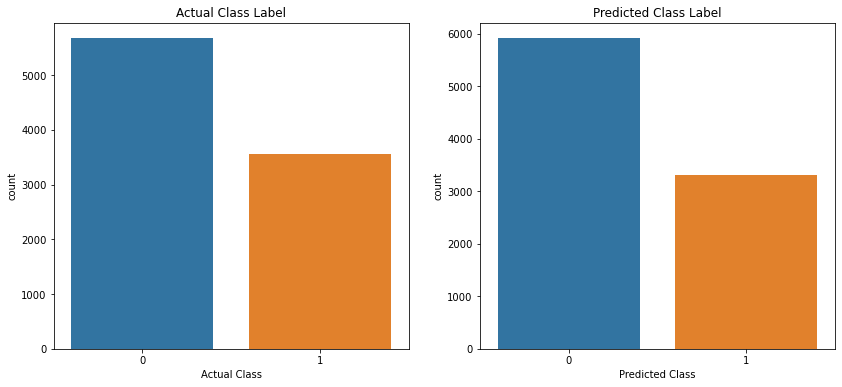

In [354]:
plt.figure(figsize=(14,6))
plt.subplot(121)
plt.title("Actual Class Label")
sns.countplot(predicted_df["Actual Class"])
plt.subplot(122)
plt.title("Predicted Class Label")
sns.countplot(predicted_df["Predicted Class"])